In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *  
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,7)
pd.set_option('display.max_columns', 500)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train_aox2jxw', 'test_bqCt9Pv.csv']


In [2]:
from fastai.tabular import *

In [3]:
dataset  = pd.read_csv("../input/train_aox2jxw/train.csv")

In [4]:
dataset.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
categorical_features_name=['Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH']
for i in categorical_features_name:
    dataset[i]=dataset[i].fillna("UNKNOWN")

In [6]:
x = dataset.iloc[:,[1,2,3,9,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values
y = dataset.iloc[:,-1].values

In [7]:
string_index=[]
for i,c in enumerate(x[0]):
    if type(c) == str:
        string_index.append(i)

string_index

[3, 10, 27, 28]

In [8]:
from sklearn.preprocessing import LabelEncoder
for i in string_index:
    labelencoder_X = LabelEncoder()
    x[:,i] = labelencoder_X.fit_transform(x[:,i])

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
#spliting data for validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [11]:
def plot_confusion_matrix(y, pred, labels, classes, normalize=False, cmap=plt.cm.Blues):
    """
    Plots the confusion matrix.
    Args:
        y: Data Labels
        pred: Predicted outputs
        labels: A list of label values to calculate confusion matrix
        classes: A list of containing unique class names for plotting
        normalize:Wheter to plot data with int or percentage values. Default is int.
        cmap: Color map pf the plot
    
    """
    cm = confusion_matrix(y, pred, labels=labels)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
def best_model(model, train, test, grid_params):
    """
    Takes a model and grid params as an input and finds the best model.
    
    Args:
        model: A model class
        train: A dict containing train features as X and labels as y
        test: A dict containing test features as X and labels as y
        grid_params: GridSearchCV parameters
        
    Returns:
        best_estimator, table and best_params
    """
    
    grid = GridSearchCV(model, grid_params, cv=4, scoring='f1_weighted', 
                        n_jobs=-1, return_train_score=True).fit(train['X'], train['y'])
    estimator = grid.best_estimator_
    table = pd.DataFrame(grid.cv_results_).loc[:, 
                ['params', 'mean_test_score', 'std_test_score','mean_train_score', 
                 'std_train_score']].sort_values(by='mean_test_score', ascending=False)
    
    params = grid.best_params_
    preds = estimator.predict(test['X'])
    plot_confusion_matrix(test['y'], preds, labels=[1, 0], classes=['target=1','target=0'])
    print(classification_report(test['y'], preds))
    
    return estimator, table, params

In [13]:
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(x_train, y_train) 
## And score it on your testing data.
rf.score(x_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7555488837897536

In [14]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = [1,2,3,9,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39],
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances.head(10)

,importance
2,0.219059
3,0.215841
1,0.197676
24,0.035518
25,0.034901
38,0.034609
33,0.033564
26,0.033371
37,0.033215
19,0.030427


In [15]:
x = dataset.iloc[:,[2,3,1,24,38,25,26,33,37,19,21]].values
y = dataset.iloc[:,-1].values

In [16]:
string_index=[]
for i,c in enumerate(x[0]):
    if type(c) == str:
        string_index.append(i)

string_index

[4, 8]

In [17]:
from sklearn.preprocessing import LabelEncoder
for i in string_index:
    labelencoder_X = LabelEncoder()
    x[:,i] = labelencoder_X.fit_transform(x[:,i])

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
#spliting data for validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     36412
           1       0.00      0.00      0.00     10219

   micro avg       0.78      0.78      0.78     46631
   macro avg       0.39      0.50      0.44     46631
weighted avg       0.61      0.78      0.68     46631



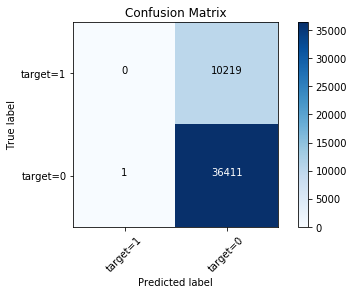

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
est, table, params = best_model(lr, train={'X': x_train, 'y': y_train},
                                test={'X': x_test, 'y':y_test},
                                grid_params=[{'solver':['liblinear', 'sag', 'newton-cg', 'lbfgs'],
                                              'C': [0.01, 0.05, 0.1, 0.5, 1, 5]}])

In [21]:
print("Best Estimator : ",est)
print("Best Parameters : " ,params)
print("Accuracy : ",jaccard_similarity_score(y_test, est.predict(x_test)))

Best Estimator :  LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Best Parameters :  {'C': 0.05, 'solver': 'liblinear'}
Accuracy :  0.7808324934056743


In [22]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = est, X = x_train, y = y_train, cv = 10)
print('accuracy_mean {0} accuracy_std {1}'.format(accuracies.mean(),accuracies.std()))

accuracy_mean 0.7834100886672258 accuracy_std 5.613409773731417e-05


In [23]:
test = pd.read_csv("../input/test_bqCt9Pv.csv")
test.isnull().values.any()


True

In [24]:
categorical_features = test.select_dtypes(include=[np.object])
categorical_features.columns

Index(['Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH'],
      dtype='object')

In [25]:
categorical_features_name=['Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH']

for i in categorical_features_name:
    test[i]=test[i].fillna("UNKNOWN")

In [26]:
index = test.iloc[:,0].values

In [27]:
x_test =  test.iloc[:,[2,3,1,24,38,25,26,33,37,19,21]].values

In [28]:
string_index=[]
for i,c in enumerate(x_test[0]):
    if type(c) == str:
        string_index.append(i)

string_index

[4, 8]

In [29]:
for i in string_index:
    x_test[:,i] = labelencoder_X.fit_transform(x_test[:,i])

In [30]:
x_test = sc_X.fit_transform(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
y_pred = est.predict(x_test)

In [32]:
df = pd.DataFrame({'UniqueID':index, 'loan_default':y_pred}, columns=['UniqueID', 'loan_default'])

In [33]:
df.head()

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0


In [34]:
df.to_csv('submission.csv', index=False)

In [35]:
!ls

__notebook__.ipynb  __output__.json  submission.csv
